In [78]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import platform
# 정규식
import re

In [79]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)
    plt.rcParams['axes.unicode_minus'] = False

In [80]:
df = pd.read_csv("usage_by_weather2.csv")
df = df.drop(columns = ['Unnamed: 0'])
df.tail(3)

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,wh,kwh
727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,58820056.15,11754265.48
728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,52733978.57,12149583.10
729,2022,12,31,1.4,1.4,0.0,66.1,12.02,805564,44225974.10,11472992.97


In [81]:
df_kwh = pd.DataFrame(df['kwh'])
df_kwh

,kwh
0,11154070.87
1,10820313.94
2,10577876.27
3,11410542.58
4,11097614.74
...,...
725,9442942.40
726,9679363.18
727,11754265.48
728,12149583.10


In [82]:
# def replace_outliers_with_mean(df, sd=0.5):
#     import pandas as pd
#     import numpy as np

#     new_df = pd.DataFrame(index=df.index, columns=df['kwh'])
    
#     for col in df.columns:
#         col_mean = df[col].mean() # 열의 평균 계산
#         col_std = df[col].std() # 열의 표준편차 계산
        
#         mask = np.abs(df[col] - col_mean) > sd * col_std # 평균에서  표준편차값(sd) 이상 떨어진 값들을 찾아내는 마스크 생성
#         new_df[col] = df[col].where(~mask, col_mean) # 마스크에 해당하는 값들을 평균값으로 대체
    
#     return new_df


# df = replace_outliers_with_mean(df)

In [83]:
df_kwh = pd.DataFrame(df['kwh'])
df_kwh

,kwh
0,11154070.87
1,10820313.94
2,10577876.27
3,11410542.58
4,11097614.74
...,...
725,9442942.40
726,9679363.18
727,11754265.48
728,12149583.10


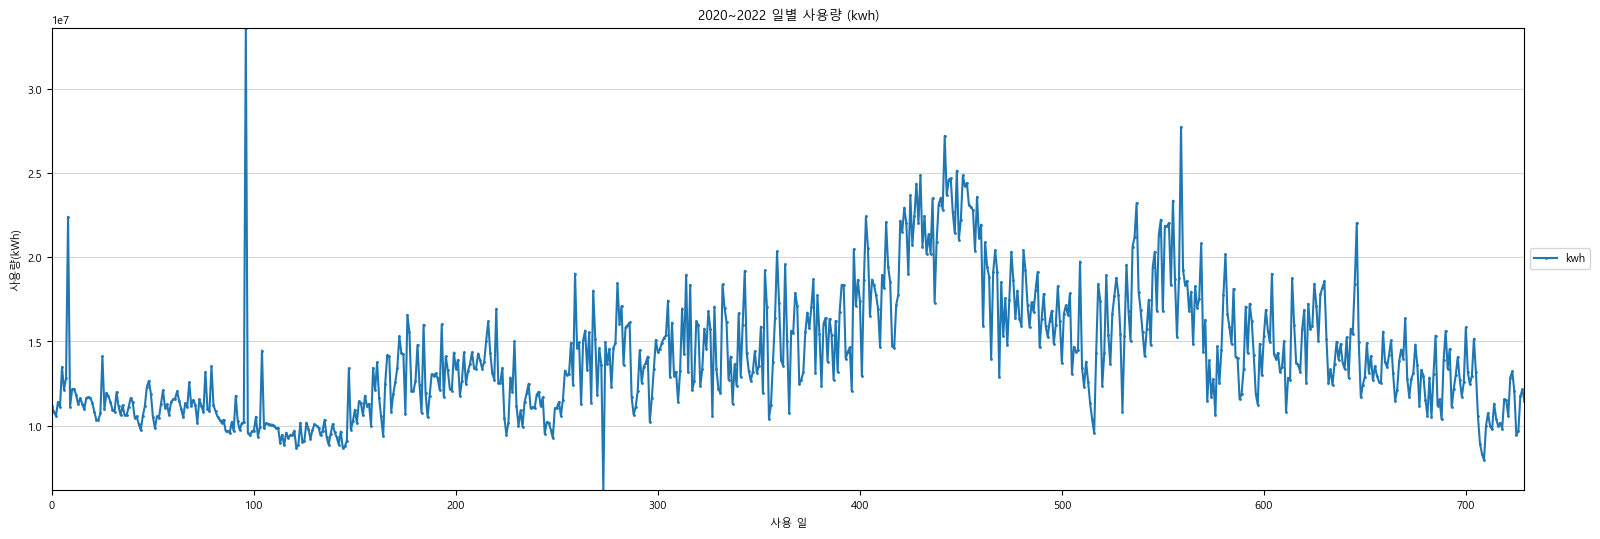

In [84]:
# 그래프 크기 설정
plt.figure(figsize=(19, 6))

# 데이터프레임을 이용하여 그래프 그리기
plt.plot(df_kwh, marker='o', markersize=1)

# y축에 그리드 추가
plt.grid(axis='y', linestyle='-', alpha=0.5)

# 그래프 범례를 그래프 밖에 위치
plt.legend(df_kwh.columns, loc='center left', bbox_to_anchor=(1, 0.5))

# 그래프 제목 설정
plt.title('2020~2022 일별 사용량 (kwh)')

# x축 레이블 설정
plt.xlabel('사용 일')

# y축 레이블 설정
plt.ylabel('사용량(kWh)')

# x, y축 범위 자동으로 설정
plt.autoscale(axis='x', tight=True)
plt.autoscale(axis='y', tight=True)

# 그래프 출력
plt.show()


In [85]:
kw_df_year_month_day = df.pivot_table(index=['day'], 
                                     columns='month',
                                     values='kwh', 
                                     aggfunc='sum')
kw_df_year_month_day

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
1,21924744.84,22895338.06,30392843.69,32644171.15,27033443.58,19728230.06,35128467.98,28608079.22,24870903.43,21050310.76,29353650.34,28699724.37
2,26440046.20,32469746.59,35231834.65,34569349.99,25438913.95,25777572.90,29225867.31,25912928.89,23007591.88,28691906.33,33799522.33,28570096.57
3,26074029.46,28254555.62,32321892.68,30653352.98,26941573.52,29727575.35,32113913.72,28242517.57,25223327.25,27053991.64,25683846.37,27263255.65
4,29287287.38,29294151.82,34489694.99,33323073.89,29289014.51,28024767.84,38216032.50,32803767.93,20979580.46,29804931.48,27813431.69,23759121.28
5,28219811.70,28616964.08,35826242.30,31272415.26,23688549.83,24150214.87,28731915.66,36366650.69,22600527.26,25161451.19,25751864.72,26615072.10
6,25956920.41,23559656.50,33012149.94,32135184.04,25432890.91,25446951.44,32362830.73,30978372.22,21983894.46,30360772.27,26316925.27,27522763.36
7,24864321.03,29272881.93,35340364.02,49528390.20,28005449.39,30226856.45,33589593.74,28988503.50,29788316.31,30340798.56,26248400.57,29839184.67
8,25984877.53,33535249.74,31962235.87,30478572.98,25732159.02,25393717.66,35085235.81,27570424.60,27056131.60,36877316.13,26814850.24,23471786.32
9,37956215.01,32173645.38,33542737.81,28859551.81,24482457.71,27083860.49,31299771.87,35055115.71,25146171.70,38069985.50,28136384.63,24908181.79


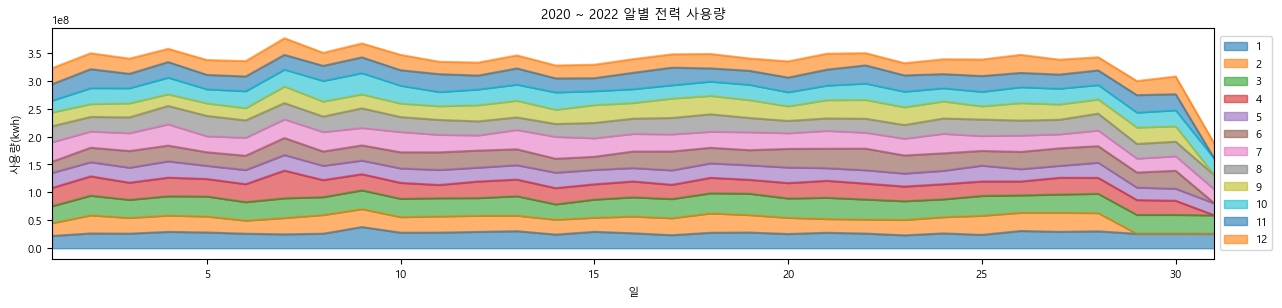

In [86]:
title='2020 ~ 2022 알별 전력 사용량'
ylabel='사용량(kwh)'
xlabel='일'

ax = kw_df_year_month_day.plot.area(figsize=(15,3),alpha=0.6, title=title)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.autoscale(axis='x', tight=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [87]:
df_type = df
kw_df = df_type.groupby(['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'customer'])['kwh'].sum()
kw_df = kw_df.to_frame().reset_index()
kw_df

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,kwh
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,11154070.87
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,10820313.94
2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,10577876.27
3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,11410542.58
4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,11097614.74
...,...,...,...,...,...,...,...,...,...,...
725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,9442942.40
726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,9679363.18
727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,11754265.48
728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,12149583.10


<AxesSubplot:title={'center':'기온과 전력 소비량(일)'}, xlabel='temp', ylabel='kwh'>

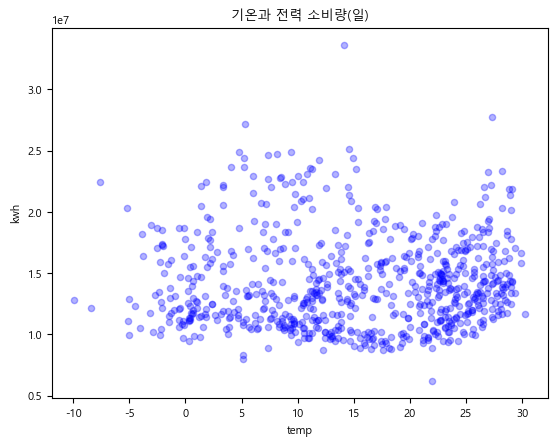

In [88]:

title='기온과 전력 소비량(일)'
ylabel='전력 소비량(kwh)'
xlabel='기온'
df.plot.scatter(x='temp', y='kwh', c='blue', cmap='coolwarm',alpha=0.3, title=title)

In [89]:

column_df = ['Humidity_mean','rainfall_total', 'cloud', 'solar']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량'}

for feature in column_df:
    fig = px.scatter(kw_df,
                    x="temp",
                    y="kwh",
                    title='날씨와 전력량에 따른 관계(일)',
                    template='plotly_dark',
                    color=feature,
                    color_continuous_scale=["white", "red"],
                    labels={'temp': '기온', 'kwh': '전력량(kWh)', feature: col_label[feature]})
    fig.show()

In [90]:
_df = ['temp', 'Humidity_mean','rainfall_total', 'cloud', 'solar']
col_label = {'temp' : '기온',
             'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량'}

for feature in _df:
    # Box plot 생성
    box = go.Box(x=kw_df[feature], y=kw_df['kwh'], boxpoints='all')

    # 레이아웃 생성
    layout = go.Layout(title='날씨와 전력량에 따른 관계(일)', xaxis={'title': col_label[feature]}, 
                    yaxis={'title': '전력량(kwh)'},
                    template='plotly_dark')

    # 그래프 생성
    fig = go.Figure(data=[box], layout=layout)

    # 그래프 출력
    fig.show()

In [91]:
_df = ['Humidity_mean','rainfall_total', 'cloud', 'solar']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량'}

for feature in _df:
    # Heatmap 생성
    heatmap = go.Heatmap(x=kw_df['temp'], y=kw_df['kwh'], z=kw_df[feature])

    # 레이아웃 생성
    layout = go.Layout(title='날씨와 전력량 데이터(일)                  색 : ' + col_label[feature],
                       xaxis={'title': '기온'}, yaxis={'title': '전력량(kwh)'})

    # 그래프 생성
    fig = go.Figure(data=[heatmap], layout=layout)

    # 그래프 출력
    fig.show()

In [92]:
kw_df.columns

Index(['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'customer', 'kwh'],
      dtype='object')

___일단위로는 적합하지 않은 그래프___

In [93]:
day1_df	= df.query('day == 1')
day2_df	= df.query('day == 2')
day3_df	= df.query('day == 3')
day4_df	= df.query('day == 4')
day5_df	= df.query('day == 5')
day6_df	= df.query('day == 6')
day7_df	= df.query('day == 7')
day8_df	= df.query('day == 8')
day9_df	= df.query('day == 9')
day10_df	= df.query('day == 10')
day11_df	= df.query('day == 11')
day12_df	= df.query('day == 12')
day13_df	= df.query('day == 13')
day14_df	= df.query('day == 14')
day15_df	= df.query('day == 15')
day16_df	= df.query('day == 16')
day17_df	= df.query('day == 17')
day18_df	= df.query('day == 18')
day19_df	= df.query('day == 19')
day20_df	= df.query('day == 20')
day21_df	= df.query('day == 21')
day22_df	= df.query('day == 22')
day23_df	= df.query('day == 23')
day24_df	= df.query('day == 24')
day25_df	= df.query('day == 25')
day26_df	= df.query('day == 26')
day27_df	= df.query('day == 27')
day28_df	= df.query('day == 28')
day29_df	= df.query('day == 29')
day30_df	= df.query('day == 30')
day31_df	= df.query('day == 31')

day_dic = [day1_df,
            day2_df,
            day3_df,
            day4_df,
            day5_df,
            day6_df,
            day7_df,
            day8_df,
            day9_df,
            day10_df,
            day11_df,
            day12_df,
            day13_df,
            day14_df,
            day15_df,
            day16_df,
            day17_df,
            day18_df,
            day19_df,
            day20_df,
            day21_df,
            day22_df,
            day23_df,
            day24_df,
            day25_df,
            day26_df,
            day27_df,
            day28_df,
            day29_df,
            day30_df,
            day31_df]


typename = {1	: '1일',
2	: '2일',
3	: '3일',
4	: '4일',
5	: '5일',
6	: '6일',
7	: '7일',
8	: '8일',
9	: '9일',
10	: '10일',
11	: '11일',
12	: '12일',
13	: '13일',
14	: '14일',
15	: '15일',
16	: '16일',
17	: '17일',
18	: '18일',
19	: '19일',
20	: '20일',
21	: '21일',
22	: '22일',
23	: '23일',
24	: '24일',
25	: '25일',
26	: '26일',
27	: '27일',
28	: '28일',
29	: '29일',
30	: '30일',
31	: '31일'}



C:\Users\admin\AppData\Local\Temp\ipykernel_6532\534243473.py:9: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



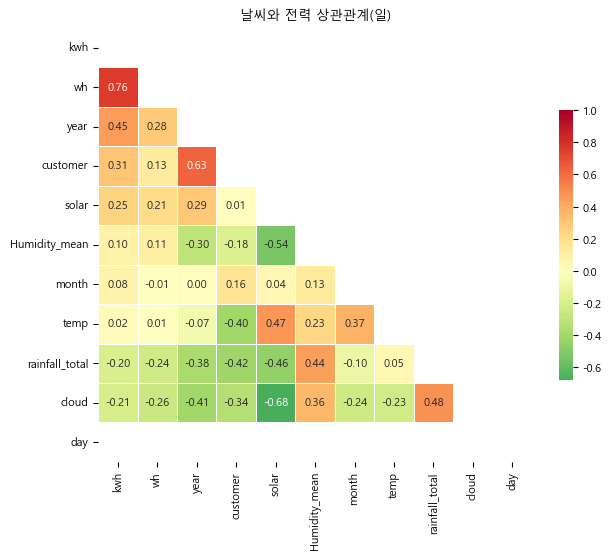

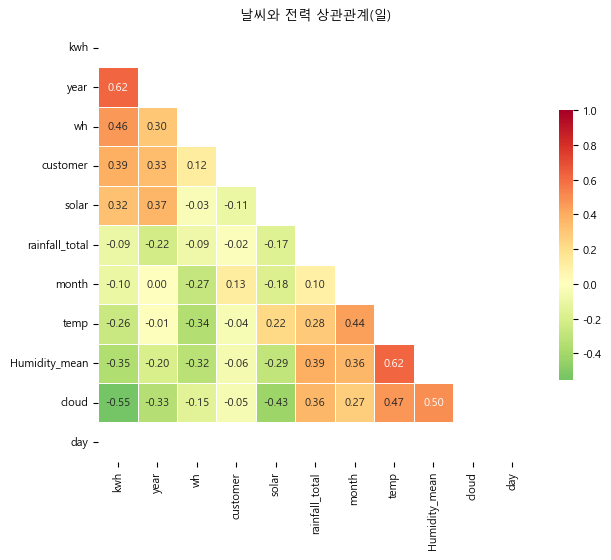

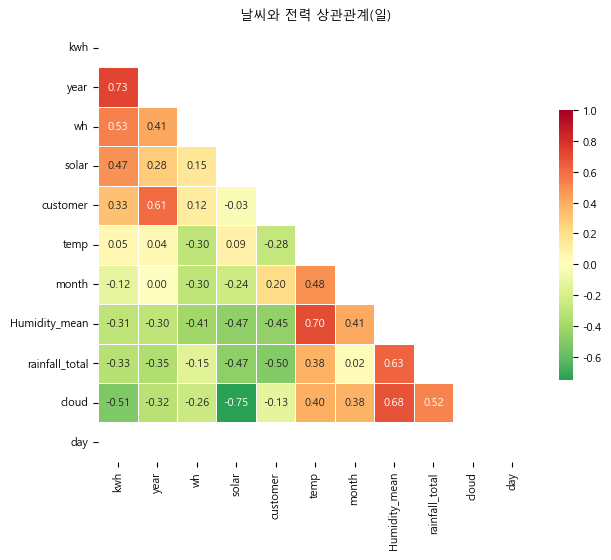

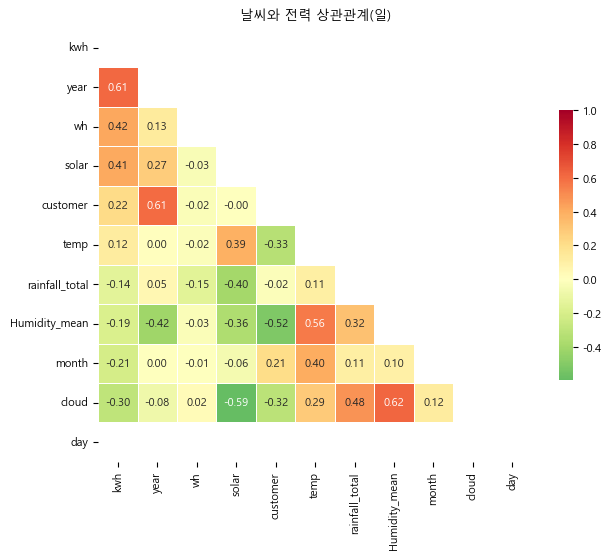

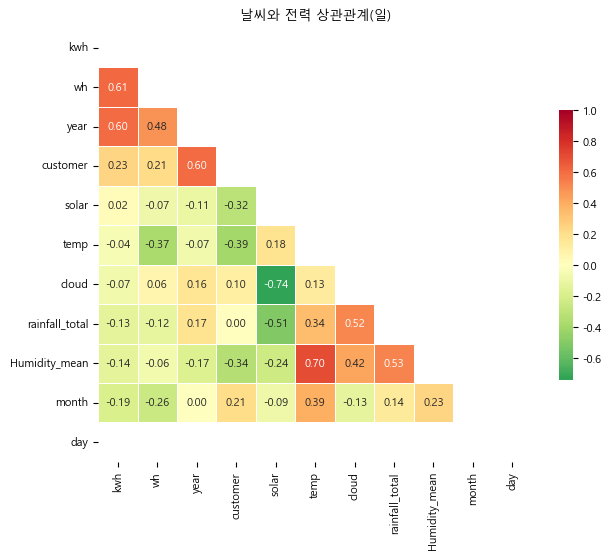

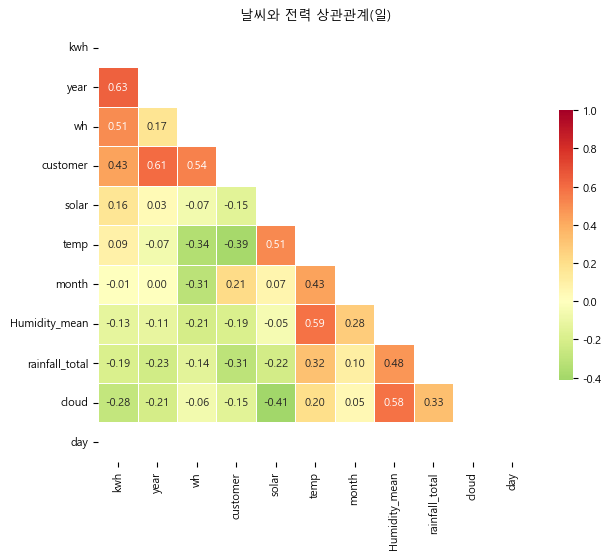

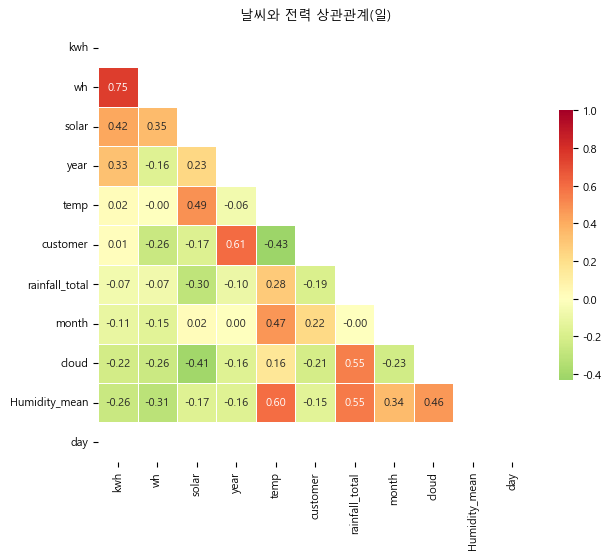

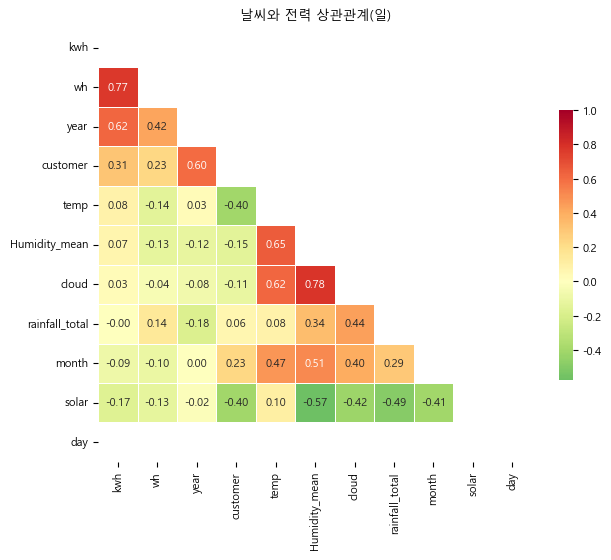

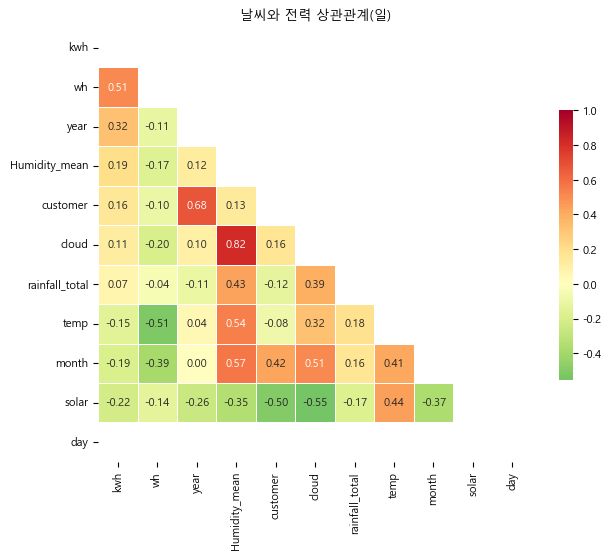

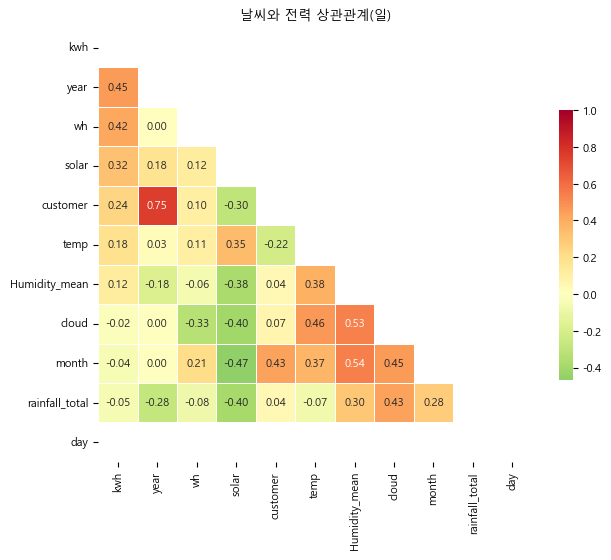

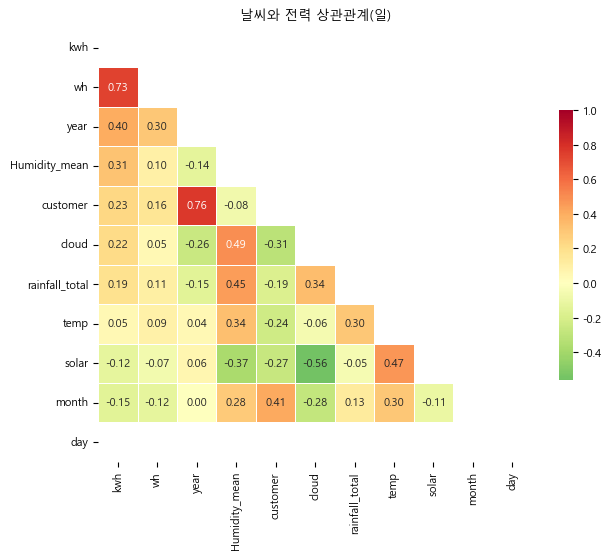

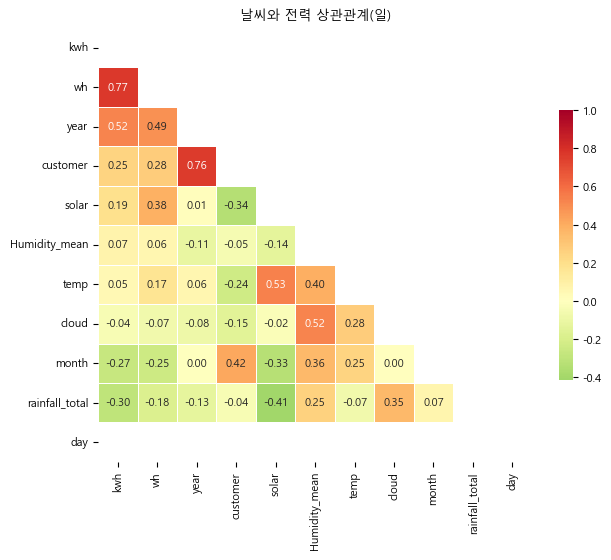

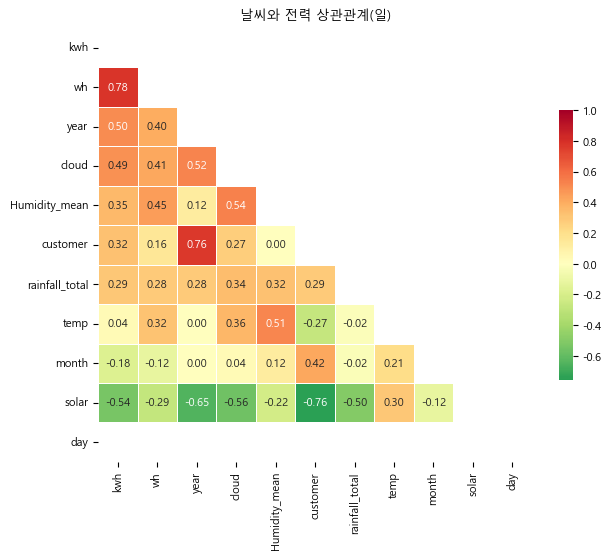

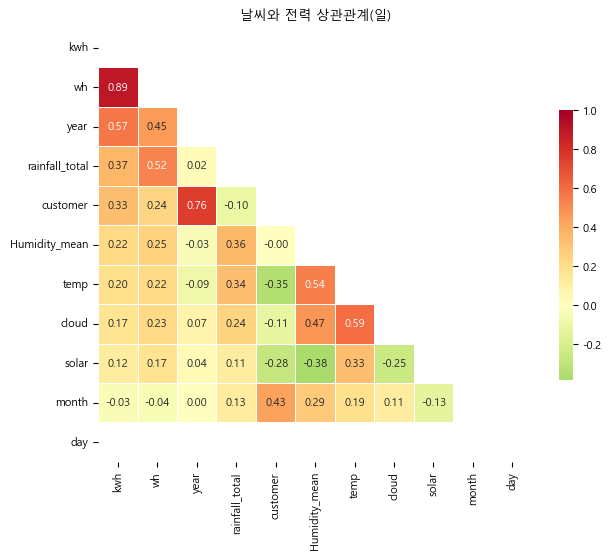

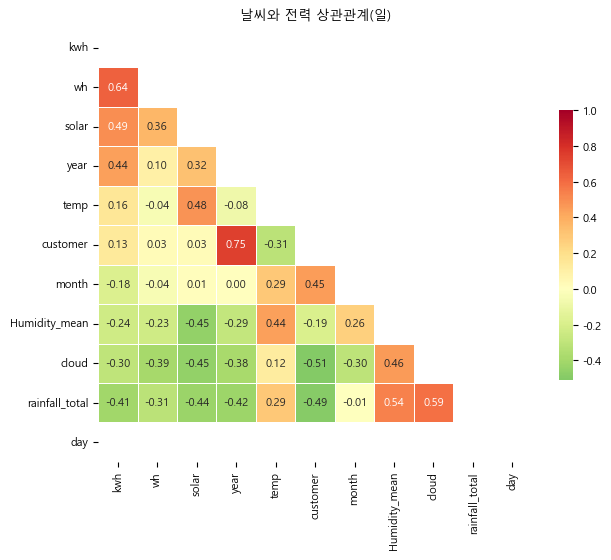

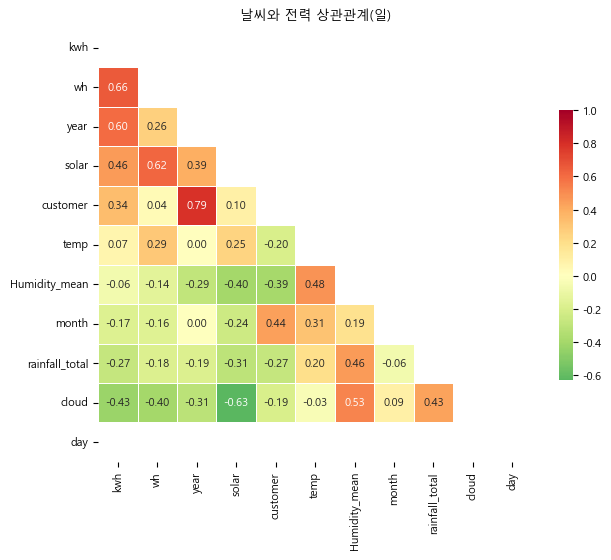

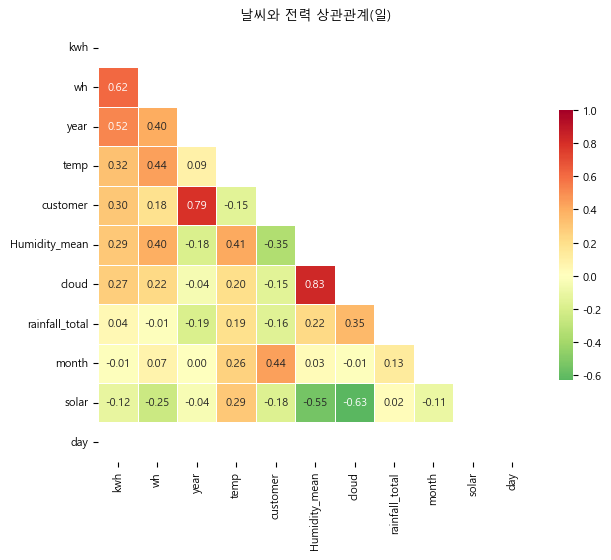

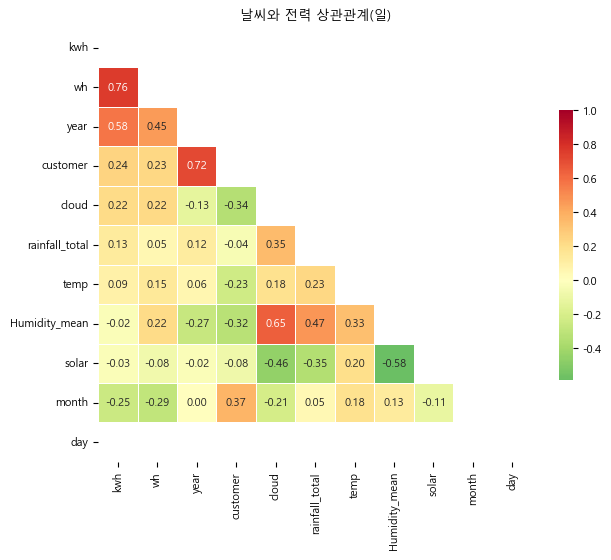

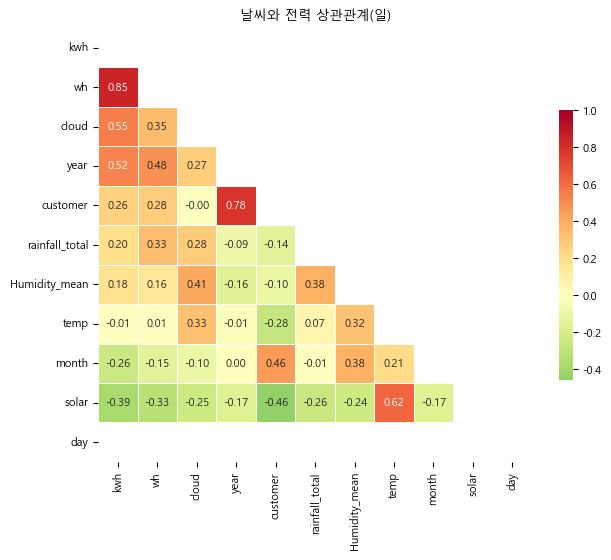

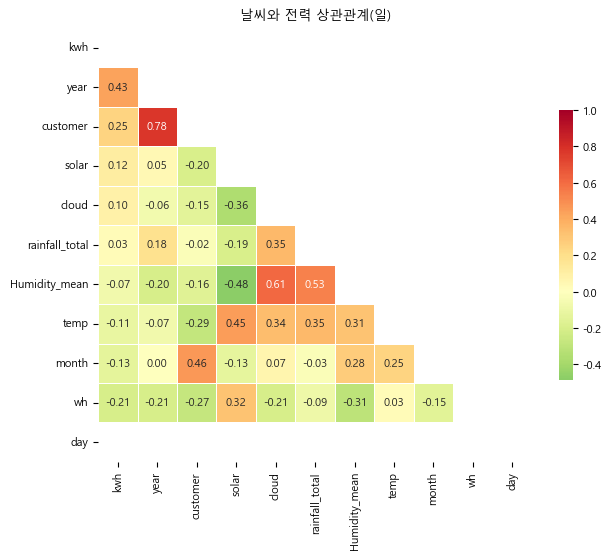

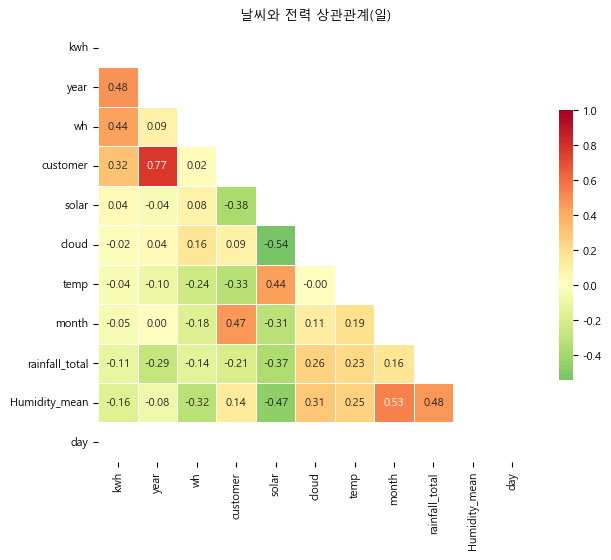

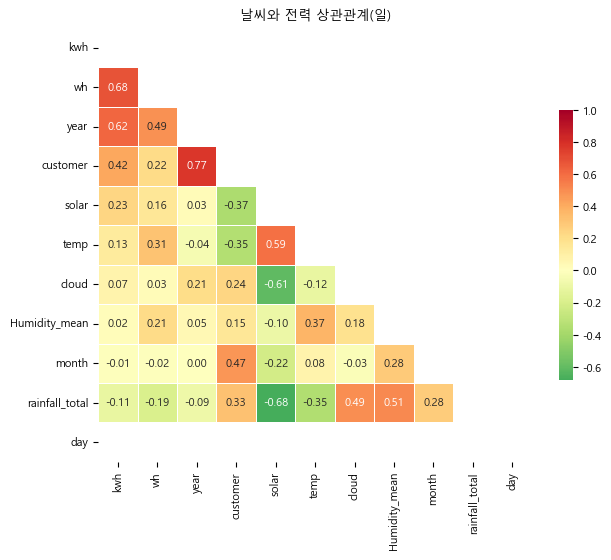

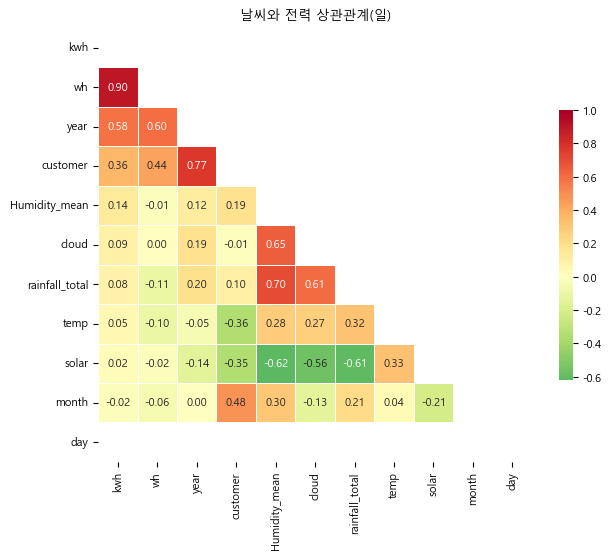

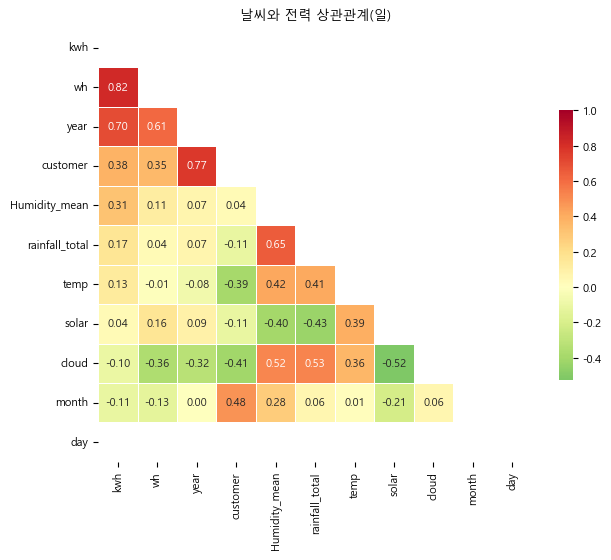

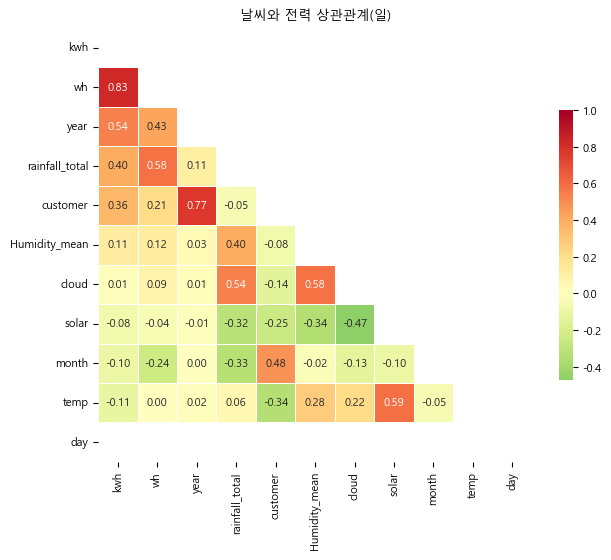

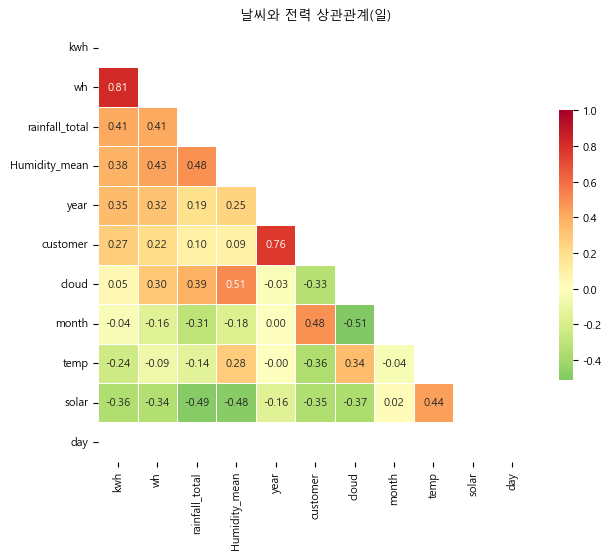

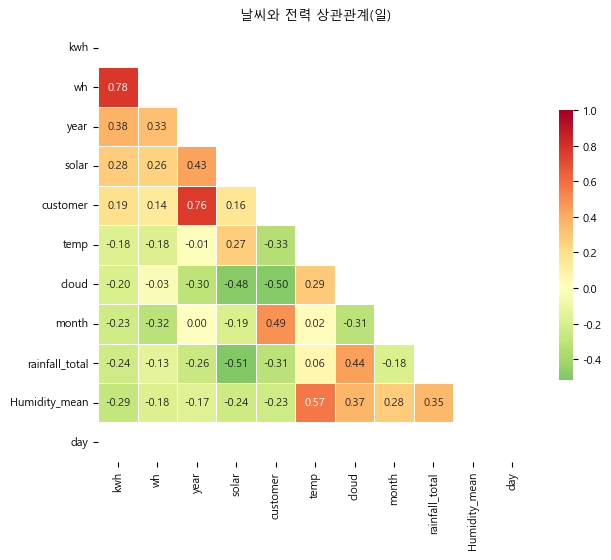

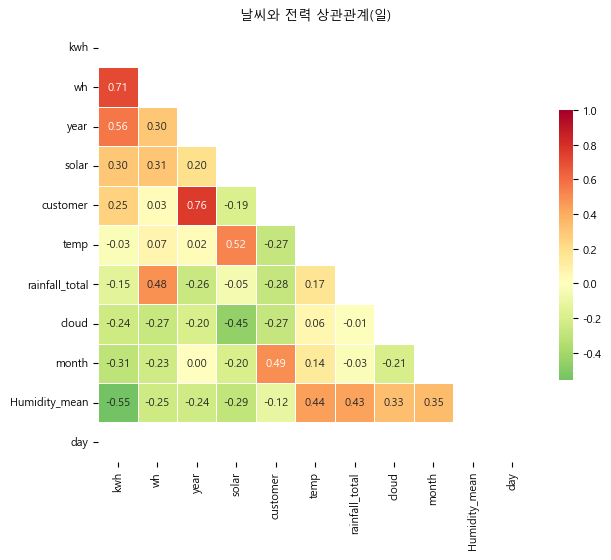

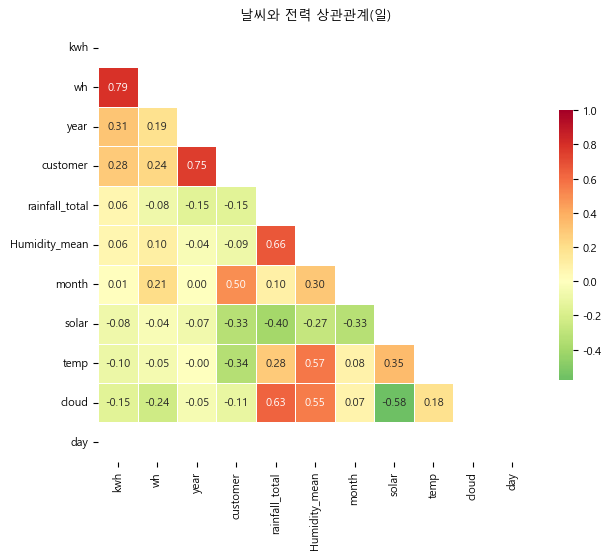

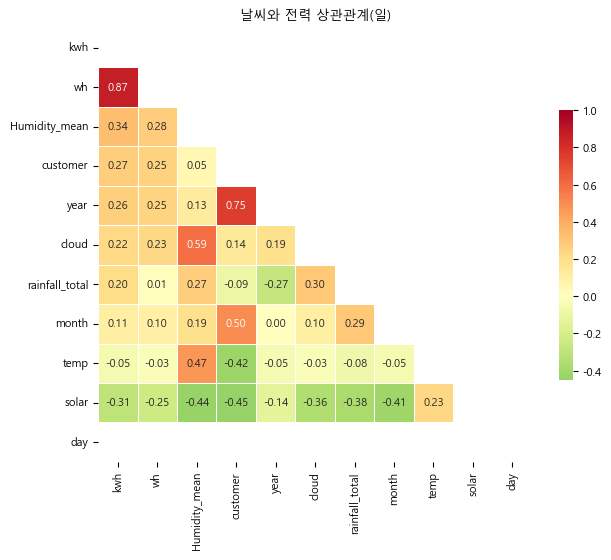

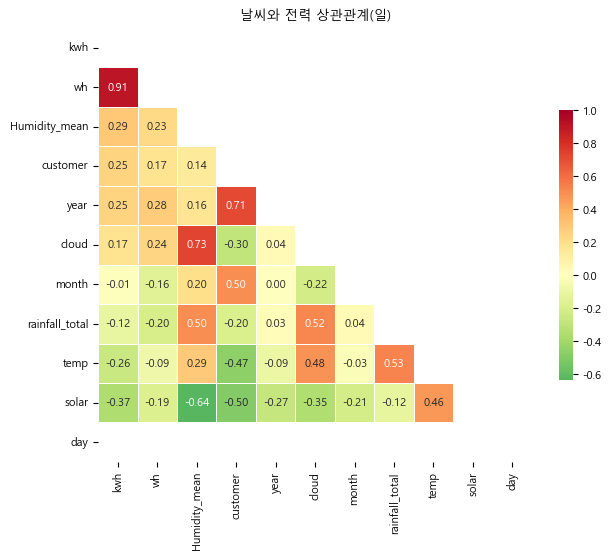

In [94]:
for i, item in enumerate(day_dic):
    num = i + 1
    
    kw_matrix = item.corr()
    kw_matrix = kw_matrix.sort_values(by = 'kwh', axis = 0, ascending=False)
    kw_matrix = kw_matrix[kw_matrix.index]
    kw_matrix
    # 상관관계의 시각적 표현
    f, ax = plt.subplots(figsize=(7, 7))
    corr = kw_matrix.select_dtypes(exclude=["object","bool"]).corr()

    # 대각 행렬을 기준으로 한 쪽만 나타나게 설정
    mask = np.zeros_like(kw_matrix, dtype='bool')
    mask[np.triu_indices_from(mask)] = True

    g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
    center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title("날씨와 전력 상관관계(일)")

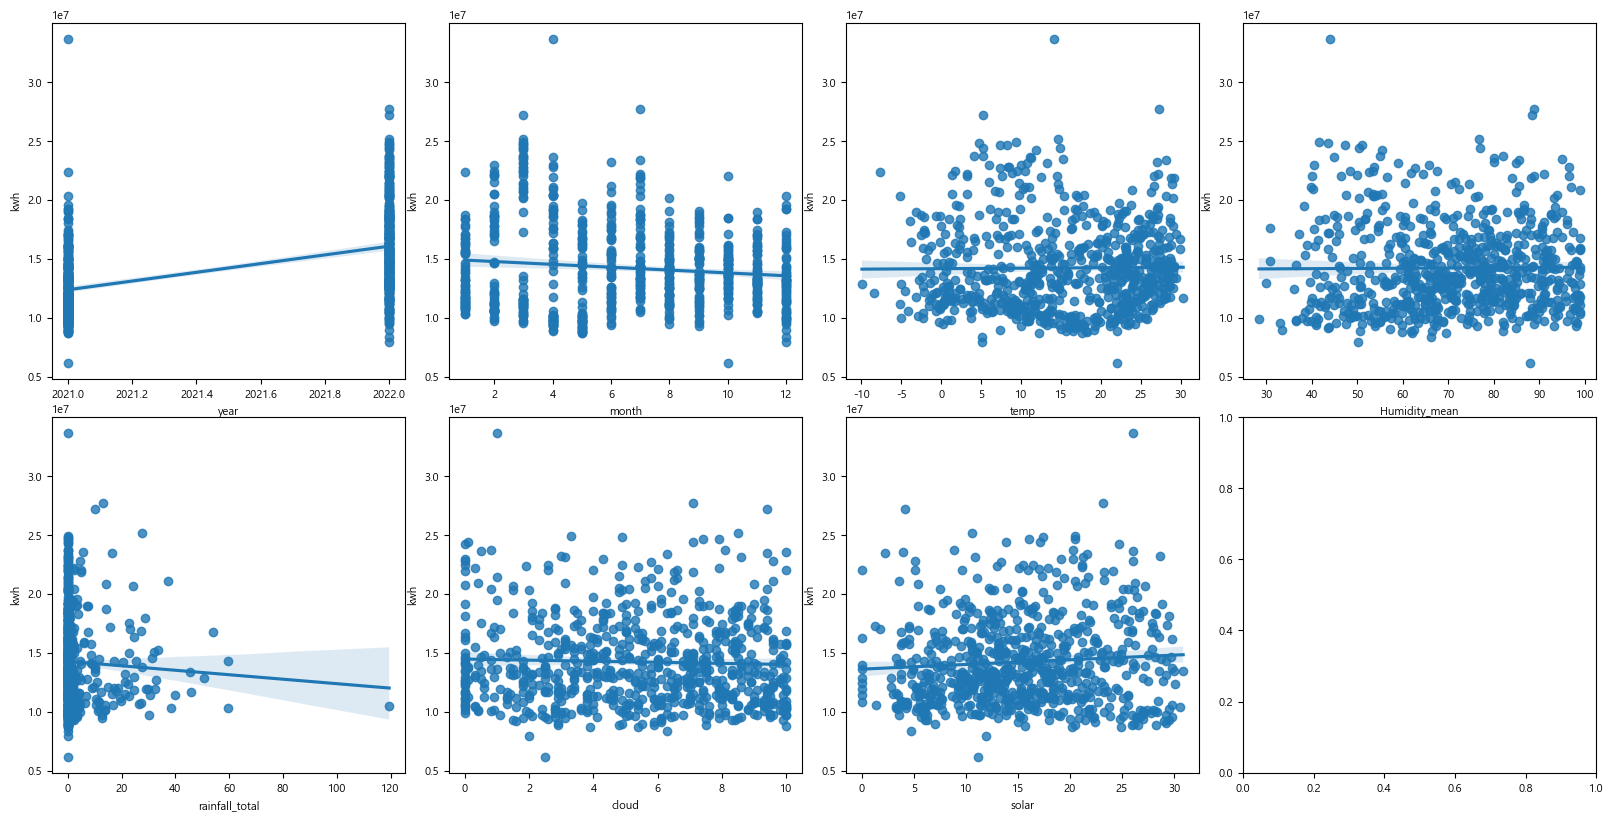

In [95]:
lm_features = ['year', 'month', 'temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar']
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 2)
plt.tight_layout()
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i % 4
    sns.regplot(x = feature, y = 'kwh', data = kw_df, ax = axs[row][col])

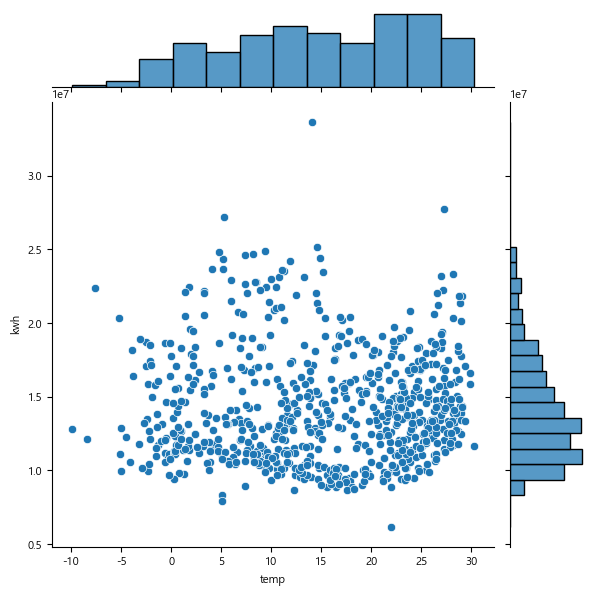

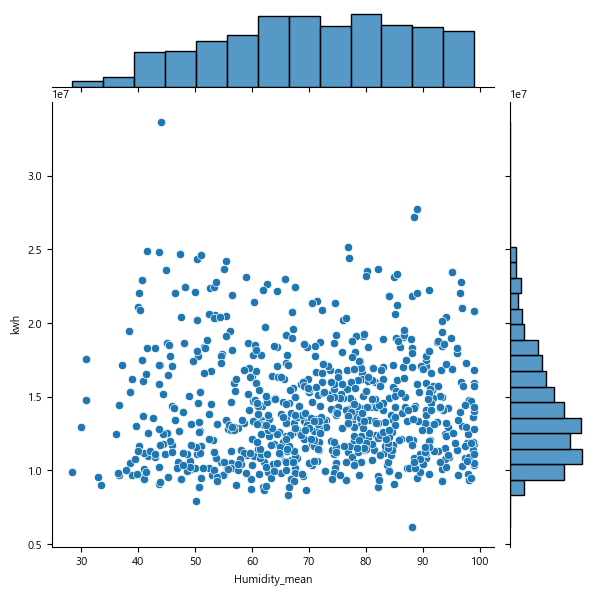

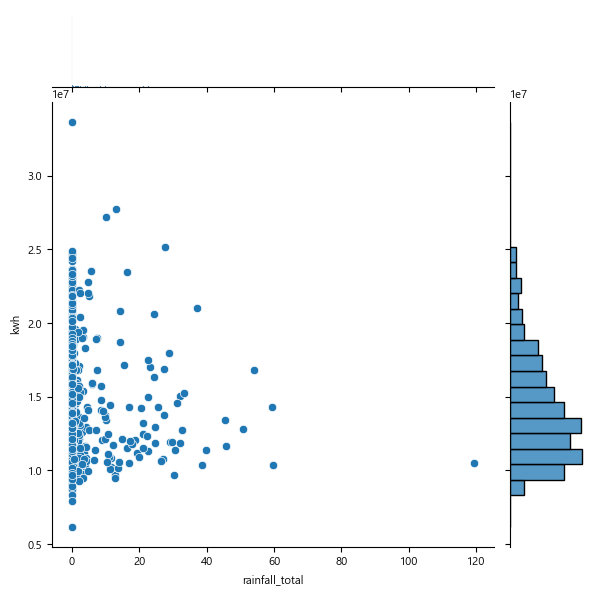

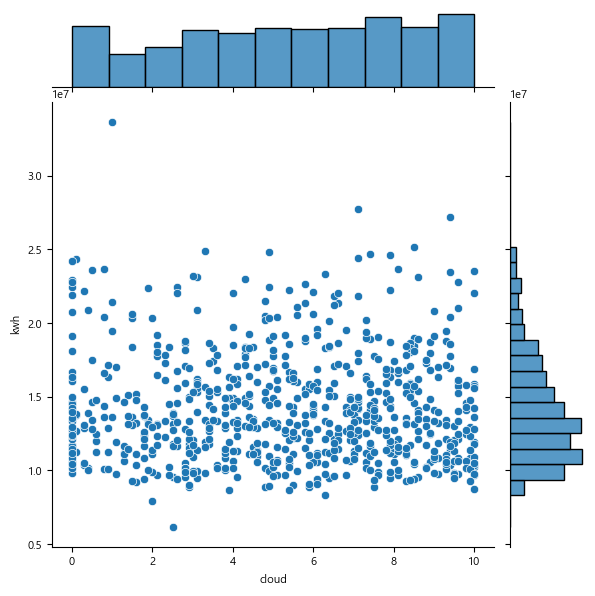

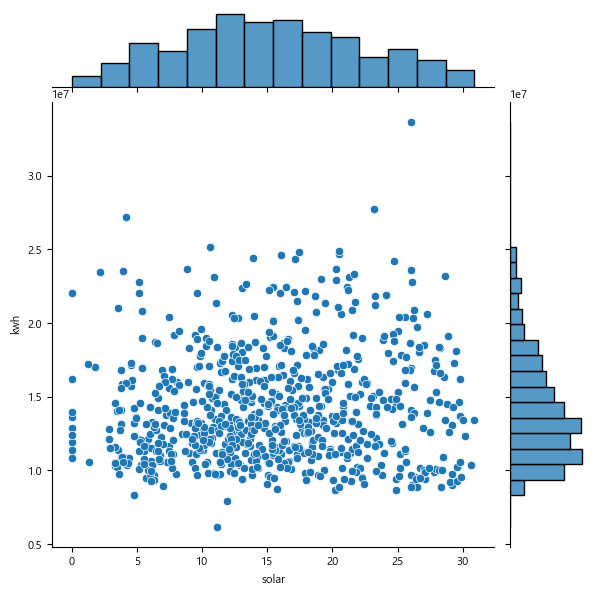

In [96]:
weather_df = ['temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar']

for feature in weather_df:
    sns.jointplot(x = feature, y = 'kwh', data = df)

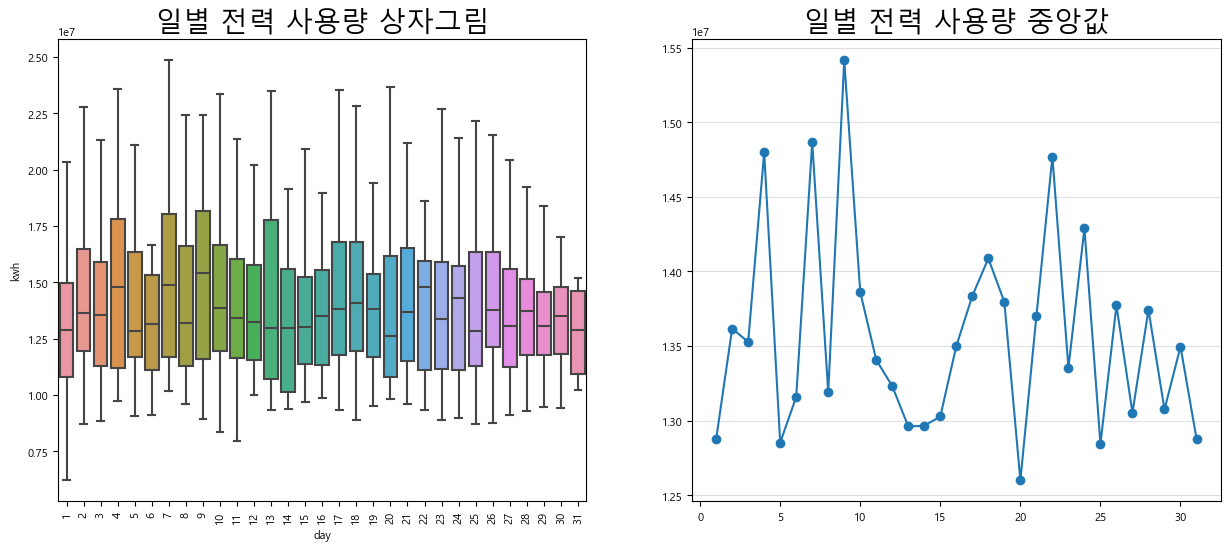

In [97]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.boxplot(x="day", y="kwh", data=kw_df, showfliers=False)
g.set_title('일별 전력 사용량 상자그림', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(1,2,2)
plt.plot(kw_df.groupby('day')['kwh'].median(), marker='o')
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.title('일별 전력 사용량 중앙값', size = 20)
plt.show()

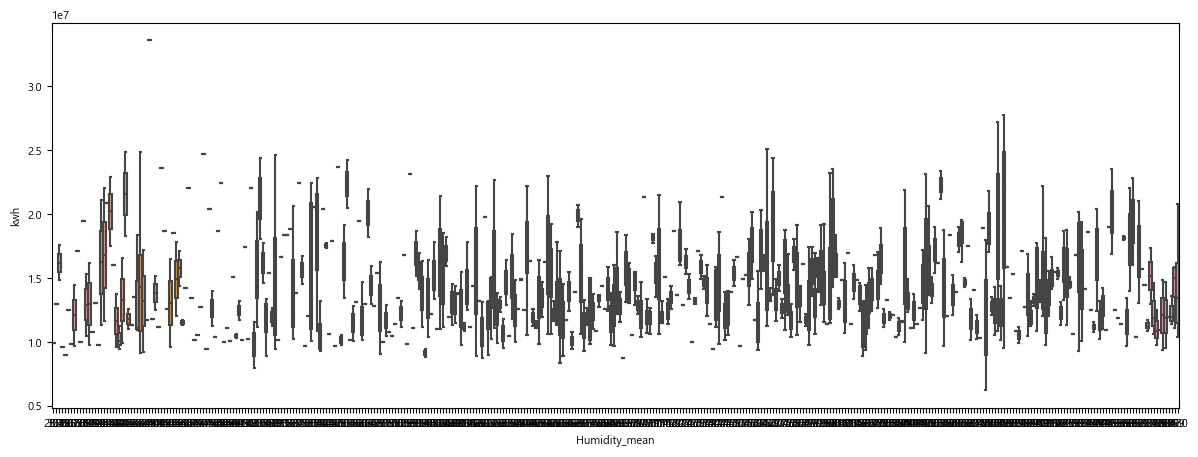

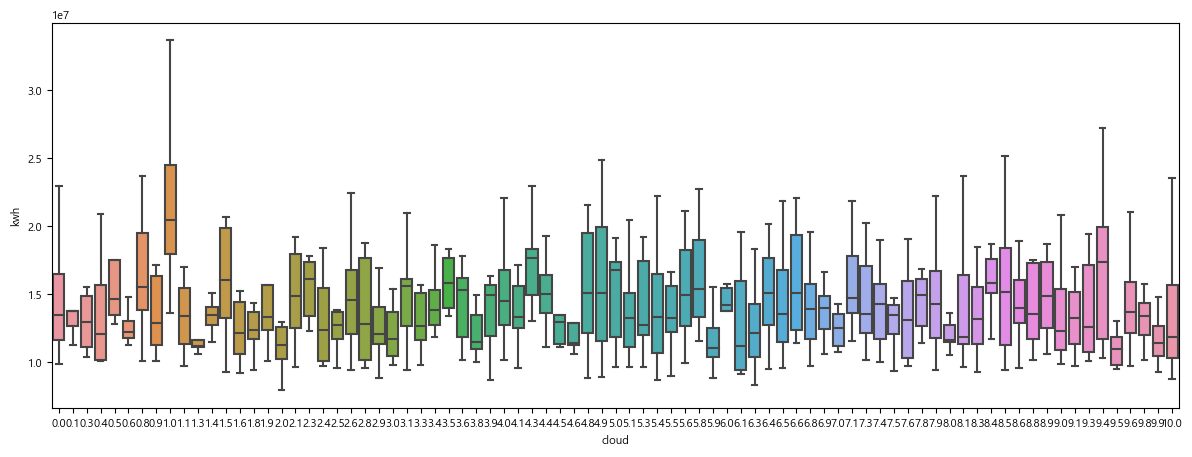

In [98]:
plt.figure(figsize=(32,5)) # 그래프 크기 조정 
plt.subplot(1,2,1) # 1행 2열의 첫번째(1행, 1열) 그래프
sns.boxplot(x='Humidity_mean', y='kwh', data = kw_df, showfliers=False)

plt.figure(figsize=(32,5), ) # 그래프 크기 조정
plt.subplot(1,2,2) # 1행 2열의 첫번째(1행, 1열) 그래프
ax = sns.boxplot(x='cloud', y='kwh', data = kw_df, showfliers=False)

plt.show()

In [99]:
kw_df_year_month_day = df.pivot_table(index=['month'], 
                                     columns='day',
                                     values='kwh', 
                                     aggfunc='sum')
kw_df_year_month_day

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,21924744.84,26440046.20,26074029.46,29287287.38,28219811.70,25956920.41,24864321.03,25984877.53,37956215.01,27841557.44,...,26218347.15,23056740.80,26564698.65,23915237.39,30894179.84,29349781.24,30281126.07,25748576.40,25754063.79,25604966.23
2,22895338.06,32469746.59,28254555.62,29294151.82,28616964.08,23559656.50,29272881.93,33535249.74,32173645.38,27883830.22,...,25168560.86,27653222.74,29066624.52,34269577.12,32587204.52,34219382.76,32656364.64,NaN,NaN,NaN
3,30392843.69,35231834.65,32321892.68,34489694.99,35826242.30,33012149.94,35340364.02,31962235.87,33542737.81,32764613.32,...,35896370.55,33528193.63,31953519.62,35501660.58,31209826.75,32587189.75,34568079.48,33897638.88,33973683.09,33309703.09
4,32644171.15,34569349.99,30653352.98,33323073.89,31272415.26,32135184.04,49528390.20,30478572.98,28859551.81,28520561.64,...,28452480.68,26244119.22,27006268.29,25804498.31,24789697.42,30003567.31,28486544.19,26630836.10,25272002.67,NaN
5,27033443.58,25438913.95,26941573.52,29289014.51,23688549.83,25432890.91,28005449.39,25732159.02,24482457.71,25972095.03,...,23986956.53,23274601.33,24145339.97,28446170.46,22190624.19,21416446.02,27207185.72,22352598.38,21593257.13,21332310.31
6,19728230.06,25777572.90,29727575.35,28024767.84,24150214.87,25446951.44,30226856.45,25393717.66,27083860.49,28749633.64,...,38519113.54,32277135.01,31105317.93,26247487.10,30708070.77,31265894.89,29513037.19,26868613.63,32055531.40,NaN
7,35128467.98,29225867.31,32113913.72,38216032.50,28731915.66,32362830.73,33589593.74,35085235.81,31299771.87,36457898.66,...,28767056.55,30180428.27,35160736.13,26862067.49,29526700.77,25118346.43,28230581.09,25091235.14,26144102.33,24915785.04
8,28608079.22,25912928.89,28242517.57,32803767.93,36366650.69,30978372.22,28988503.50,27570424.60,35055115.71,26632945.26,...,24794833.08,24369037.89,27234035.22,29367153.49,26686834.51,26042453.03,30050092.31,26102980.78,25970545.64,25464423.87
9,24870903.43,23007591.88,25223327.25,20979580.46,22600527.26,21983894.46,29788316.31,27056131.60,25146171.70,24229034.09,...,33828759.09,31901421.46,30714431.16,23870806.57,31363687.33,27569280.59,25537234.64,29572342.78,27534737.62,NaN


In [100]:
kw_df_year_month_day.rename(columns={
                                    1	: '1일',
                                    2	: '2일',
                                    3	: '3일',
                                    4	: '4일',
                                    5	: '5일',
                                    6	: '6일',
                                    7	: '7일',
                                    8	: '8일',
                                    9	: '9일',
                                    10	: '10일',
                                    11	: '11일',
                                    12	: '12일',
                                    13	: '13일',
                                    14	: '14일',
                                    15	: '15일',
                                    16	: '16일',
                                    17	: '17일',
                                    18	: '18일',
                                    19	: '19일',
                                    20	: '20일',
                                    21	: '21일',
                                    22	: '22일',
                                    23	: '23일',
                                    24	: '24일',
                                    25	: '25일',
                                    26	: '26일',
                                    27	: '27일',
                                    28	: '28일',
                                    29	: '29일',
                                    30	: '30일',
                                    31	: '31일'},
                                    inplace=True)

___월별로도 재작성___

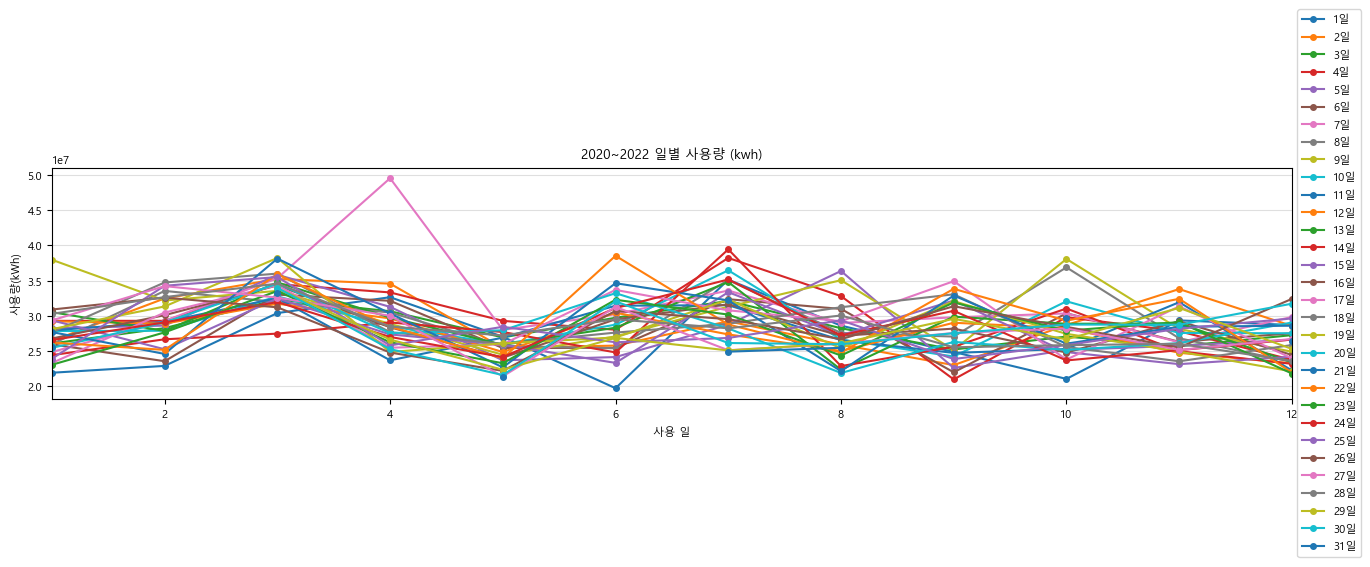

In [101]:
plt.figure(figsize = (16,3))
plt.plot(kw_df_year_month_day, marker = 'o', markersize=4)
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.legend(kw_df_year_month_day.columns, 
           loc='center left', bbox_to_anchor=(1, 0.5)) # 그래프 범례를 그래프 밖에 위치
plt.title('2020~2022 일별 사용량 (kwh)')
plt.xlabel('사용 일')
plt.ylabel('사용량(kWh)')
plt.autoscale(axis='x', tight=True)
plt.show()